## Project 2

Will Russell
V00788739

### Perceptron Implementation


In [27]:
from project_code.fileWorker import retrieve_students
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook



In [55]:

male_color = [ .4196,0.957,0.259,.5]
female_color = [ .7, .1843, .6, .5]

def find_intercepts_for_line(weights):
    y_int = -(weights[0]/weights[2])
    x_int = -(weights[0]/weights[1])
    return [0,y_int], [x_int, 0]

def find_intercepts_for_all_lines(weights_list=[[0.,0.,0.],[0.,0.,0.]]):
    values = []
    for weights in weights_list:
        values.append(find_intercepts_for_line(weights))
    return values

def separate_normalized_students(dataset=[]):
    male_students = [x for x in dataset if x[2] == 0]
    female_students = [x for x in dataset if x[2] == 1]
    return male_students, female_students

def separate_and_normalize_students(dataset=[]):
    students = normalize_student_data(dataset)
    return separate_normalized_students(students)

def plot_normalized_data(normal_male_students, normal_female_students, x_vals=[0,1], y_vals=[1,0]):
    male_heights = [x[0] for x in normal_male_students]
    male_weights = [x[1] for x in normal_male_students]
    female_heights = [x[0] for x in normal_female_students]
    female_weights = [x[1] for x in normal_female_students]
    x1, x2 = x_vals[0], x_vals[1]
    y1, y2 = y_vals[0], y_vals[1]
    plt.figure("Scenario B : Height and Weight : {}")
    plt.title("Student Height/Weight")
    plt.xlabel("Weight")
    plt.ylabel("Height")
    plt.scatter(male_weights,male_heights,marker="s",color=male_color, edgecolors="darkgreen")
    plt.scatter(female_weights, female_heights, marker='o', color=female_color, edgecolors="violet")
    plt.plot([x2, x1],[y2, y1], 'k-', lw=2)
    plt.show()

def plot_animated_data(normal_male_students, normal_female_students, results):
    # Generate points from normalized male and female students
    male_heights = [x[0] for x in normal_male_students]
    male_weights = [x[1] for x in normal_male_students]
    female_heights = [x[0] for x in normal_female_students]
    female_weights = [x[1] for x in normal_female_students]

    fig = plt.figure()
    ax = plt.axes(xlim=(0,1), ylim=(0,1))
    line, = ax.plot([],[], lw=2)
    male_points = ax.scatter(male_heights,male_weights,marker="s",color=male_color, edgecolors="darkgreen")
    female_points = ax.scatter(female_heights,female_weights,marker='o', color=female_color, edgecolors="violet")
    weights_list = [x[1] for x in results]
    line_points = find_intercepts_for_all_lines(weights_list)
    ttl = ax.text(.5, 1.05, '', transform = ax.transAxes, va='center')

    def init():
        line.set_data([],[])
        ttl.set_text('Iteration : ')
        return line

    def animate(i):
        ttl.set_text("Iteration : {}".format(i))
        x_vals, y_vals = line_points[i]
        line.set_data(x_vals, y_vals)
        return line
    
    return animation.FuncAnimation(fig, animate,init_func=init, frames=iterations, interval=300, blit=True)

    
    


### Randomly select the sample from the normalized student list

In [56]:
from project_code.data import normalize_student_data
from project_code.perceptron import Perceptron
from matplotlib import animation
import random
student_list = normalize_student_data(students)
print(len(students))
student_train = random.sample(student_list, 2000)
student_test = random.sample(student_list, 100)
weights = [random.random() for i in range(3)]
print(weights)

male_students, female_students = separate_normalized_students(student_test)


4000
[0.1771069481772224, 0.432081005047784, 0.12858015706612635]


<IPython.core.display.Javascript object>


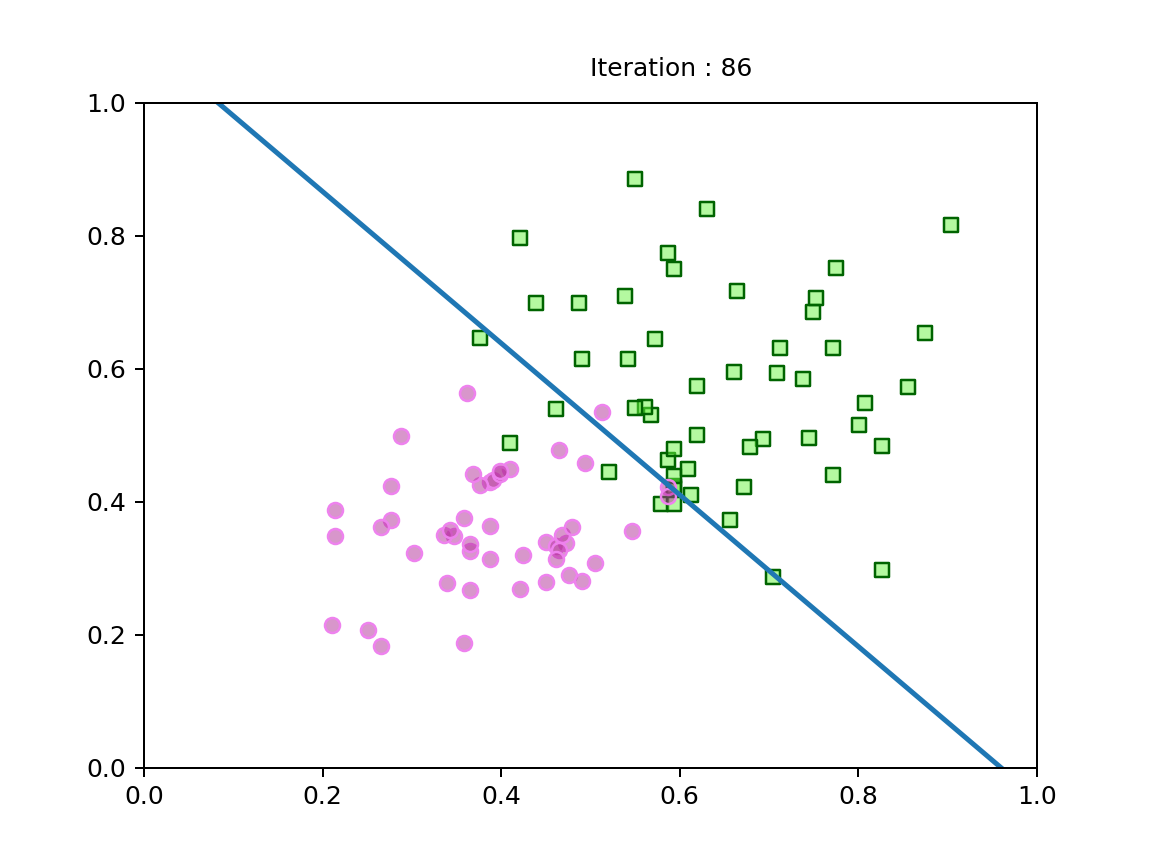

In [60]:
iterations=100
p = Perceptron(ite=iterations, alpha=0.01)
hard_results = p.train(student_train, weights=weights, activation="hard")

anim = plot_animated_data( male_students, female_students, hard_results)
plt.show()

<IPython.core.display.Javascript object>


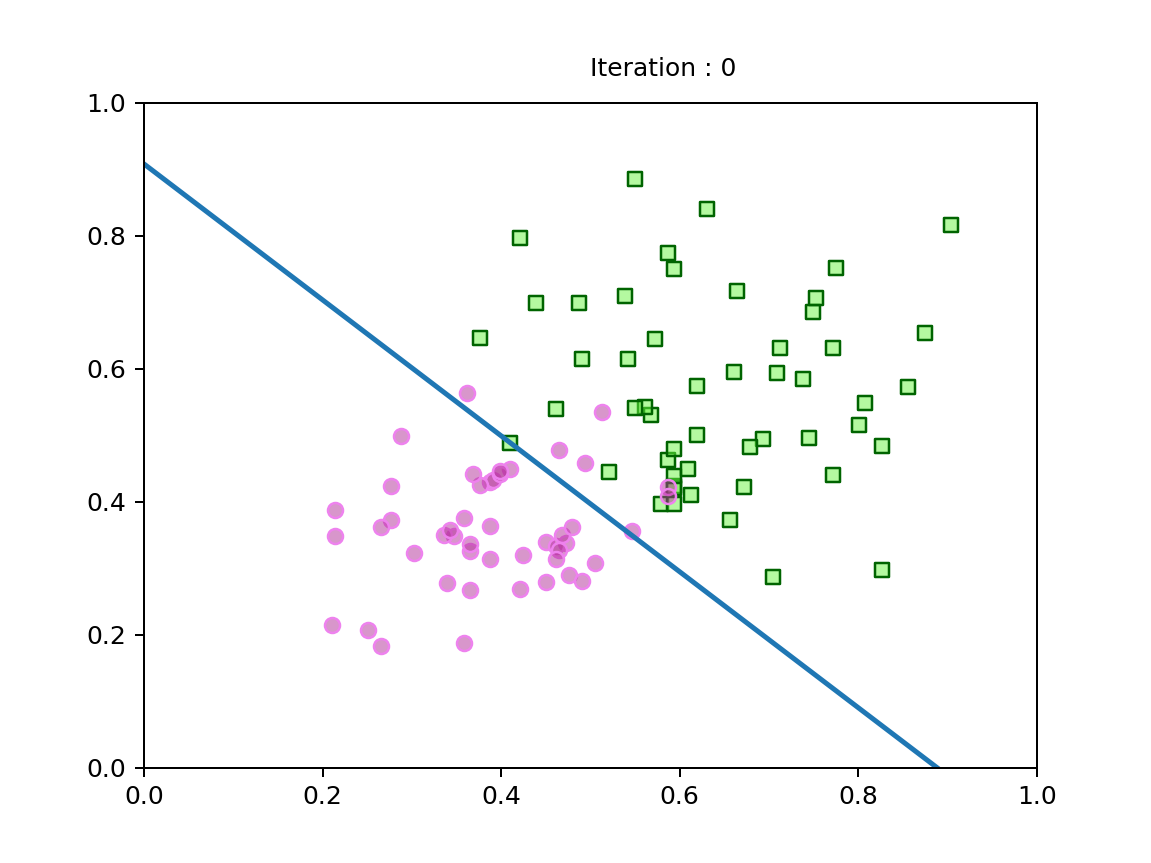

In [61]:
iterations=100
p = Perceptron(ite=iterations, alpha=0.5)
hard_results = p.train(student_train, weights=weights, activation="hard")

anim = plot_animated_data( male_students, female_students, hard_results)
plt.show()
